This is an example of a simple compositional data analysis with the `composition_stats` package. The data is the number of candy of a given color per bag.

In [1]:
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

Load the data from file. There are 6 columns, one for each colour, and 30 rows with the individual samples.

In [3]:
data = np.genfromtxt('data/candy.txt', delimiter=',', skip_header=1)

In [4]:
colours = ['Red', 'Green', 'Blue', 'Orange', 'Yellow', 'Brown']

In [5]:
np.shape(data)

(30, 6)

Plot the distribution of numbers for each colour.

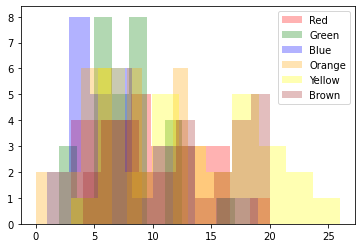

In [6]:
for i, c in enumerate(colours):
    plt.hist(data[:, i], histtype='stepfilled', fc=c, alpha=0.3, label=c)
plt.legend()
plt.show()

Plot the distribution of total number.

In [7]:
total = np.sum(data, axis=-1)

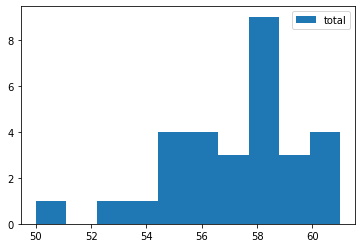

In [8]:
plt.hist(total, histtype='stepfilled', label='total')
plt.legend()
plt.show()

As the total number of candies is not constant, we might be interested in analysing the distribution of the composition of the candies. The first step is to convert the numbers into fractions of the total using the `closure()` function from `composition_stats`.

In [9]:
from composition_stats import closure

In [10]:
comp = closure(data)

In [11]:
print(comp)

[[0.05172414 0.0862069  0.18965517 0.20689655 0.18965517 0.27586207]
 [0.06896552 0.03448276 0.17241379 0.10344828 0.31034483 0.31034483]
 [0.07272727 0.10909091 0.16363636 0.07272727 0.21818182 0.36363636]
 [0.07142857 0.10714286 0.125      0.10714286 0.25       0.33928571]
 [0.0877193  0.0877193  0.28070175 0.21052632 0.12280702 0.21052632]
 [0.09259259 0.07407407 0.03703704 0.16666667 0.33333333 0.2962963 ]
 [0.10344828 0.12068966 0.05172414 0.10344828 0.44827586 0.17241379]
 [0.10714286 0.10714286 0.10714286 0.07142857 0.375      0.23214286]
 [0.13793103 0.13793103 0.10344828 0.0862069  0.18965517 0.34482759]
 [0.13333333 0.15       0.21666667 0.06666667 0.25       0.18333333]
 [0.13333333 0.11666667 0.11666667 0.21666667 0.11666667 0.3       ]
 [0.14545455 0.16363636 0.07272727 0.10909091 0.38181818 0.12727273]
 [0.15254237 0.28813559 0.3220339  0.05084746 0.05084746 0.13559322]
 [0.16981132 0.16981132 0.05660377 0.16981132 0.1509434  0.28301887]
 [0.15517241 0.18965517 0.22413793

The output above shows that there is a zero entry in the data. As discussed by Martín-Fernández et al. (2003), zero entries must be handled with care in compositional data. For the sake of this example, we can pretend that there were "trace amounts" of orange candy in the sample, and replace the zero entry by a small positive number. This is done in the correct way using the `multiplicative_replacement()` function from the package.

In [12]:
from composition_stats import multiplicative_replacement

In [13]:
comp = multiplicative_replacement(comp, 1e-10)

We can now apply any of the ILR, CLR, ALR transformations to the compositional data. Here we use the `ilr()` function from the package.

In [14]:
from composition_stats import ilr

In [15]:
trafo = ilr(comp)